In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from perspective import Perspective
from util import show_side_by_side, images_in_directory
%matplotlib inline


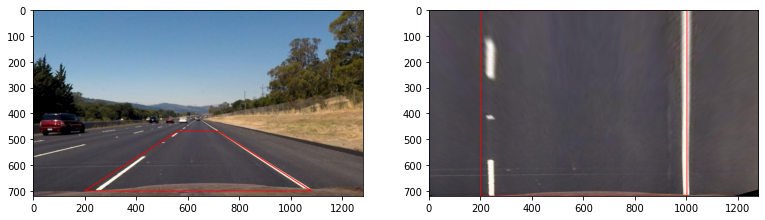

In [5]:

class RegionOfInterest:
    def __init__(self, img_size):
        (self.width, self.height) = img_size
        self.bottom_y = 700
        self.horizon_y = 468
        self.bottom_left_x = 200
        self.bottom_right_x = 1080
        self.horizon_left_x = 562
        self.horizon_right_x = 718

    @property
    def perspective(self):
        return np.float32(
            [
                [self.bottom_left_x, self.bottom_y],
                [self.horizon_left_x, self.horizon_y],
                [self.horizon_right_x, self.horizon_y],
                [self.bottom_right_x, self.bottom_y],
            ]
        )

    @property
    def rectangle(self):
        return np.float32(
            [
                [200, self.height],
                [200, 0],
                [1000, 0],
                [1000, self.height],
            ]
        )

image = mpimg.imread('output_images/undistorted_test_images/undistorted_test_images_4.jpg')
region = RegionOfInterest((1280,720))
perspective = Perspective(region)
bird_view_image = perspective.bird_view(np.copy(image))
cv2.polylines(image, [np.int32(region.perspective).reshape((-1,1,2))], True, (255,0,0), thickness=2)
cv2.polylines(bird_view_image, [np.int32(region.rectangle).reshape((-1,1,2))], True, (255,0,0), thickness=2)
# #plt.imshow(p.bird_view(image))



fig = plt.figure(figsize=(13, 10)) #figsize=(13, 10) matplotlib inline / (9,5) matplotlib notebook
fig.add_subplot(2, 2, 1)
plt.imshow(image)
fig.add_subplot(2, 2, 2)
plt.imshow(bird_view_image)


<IPython.core.display.Javascript object>


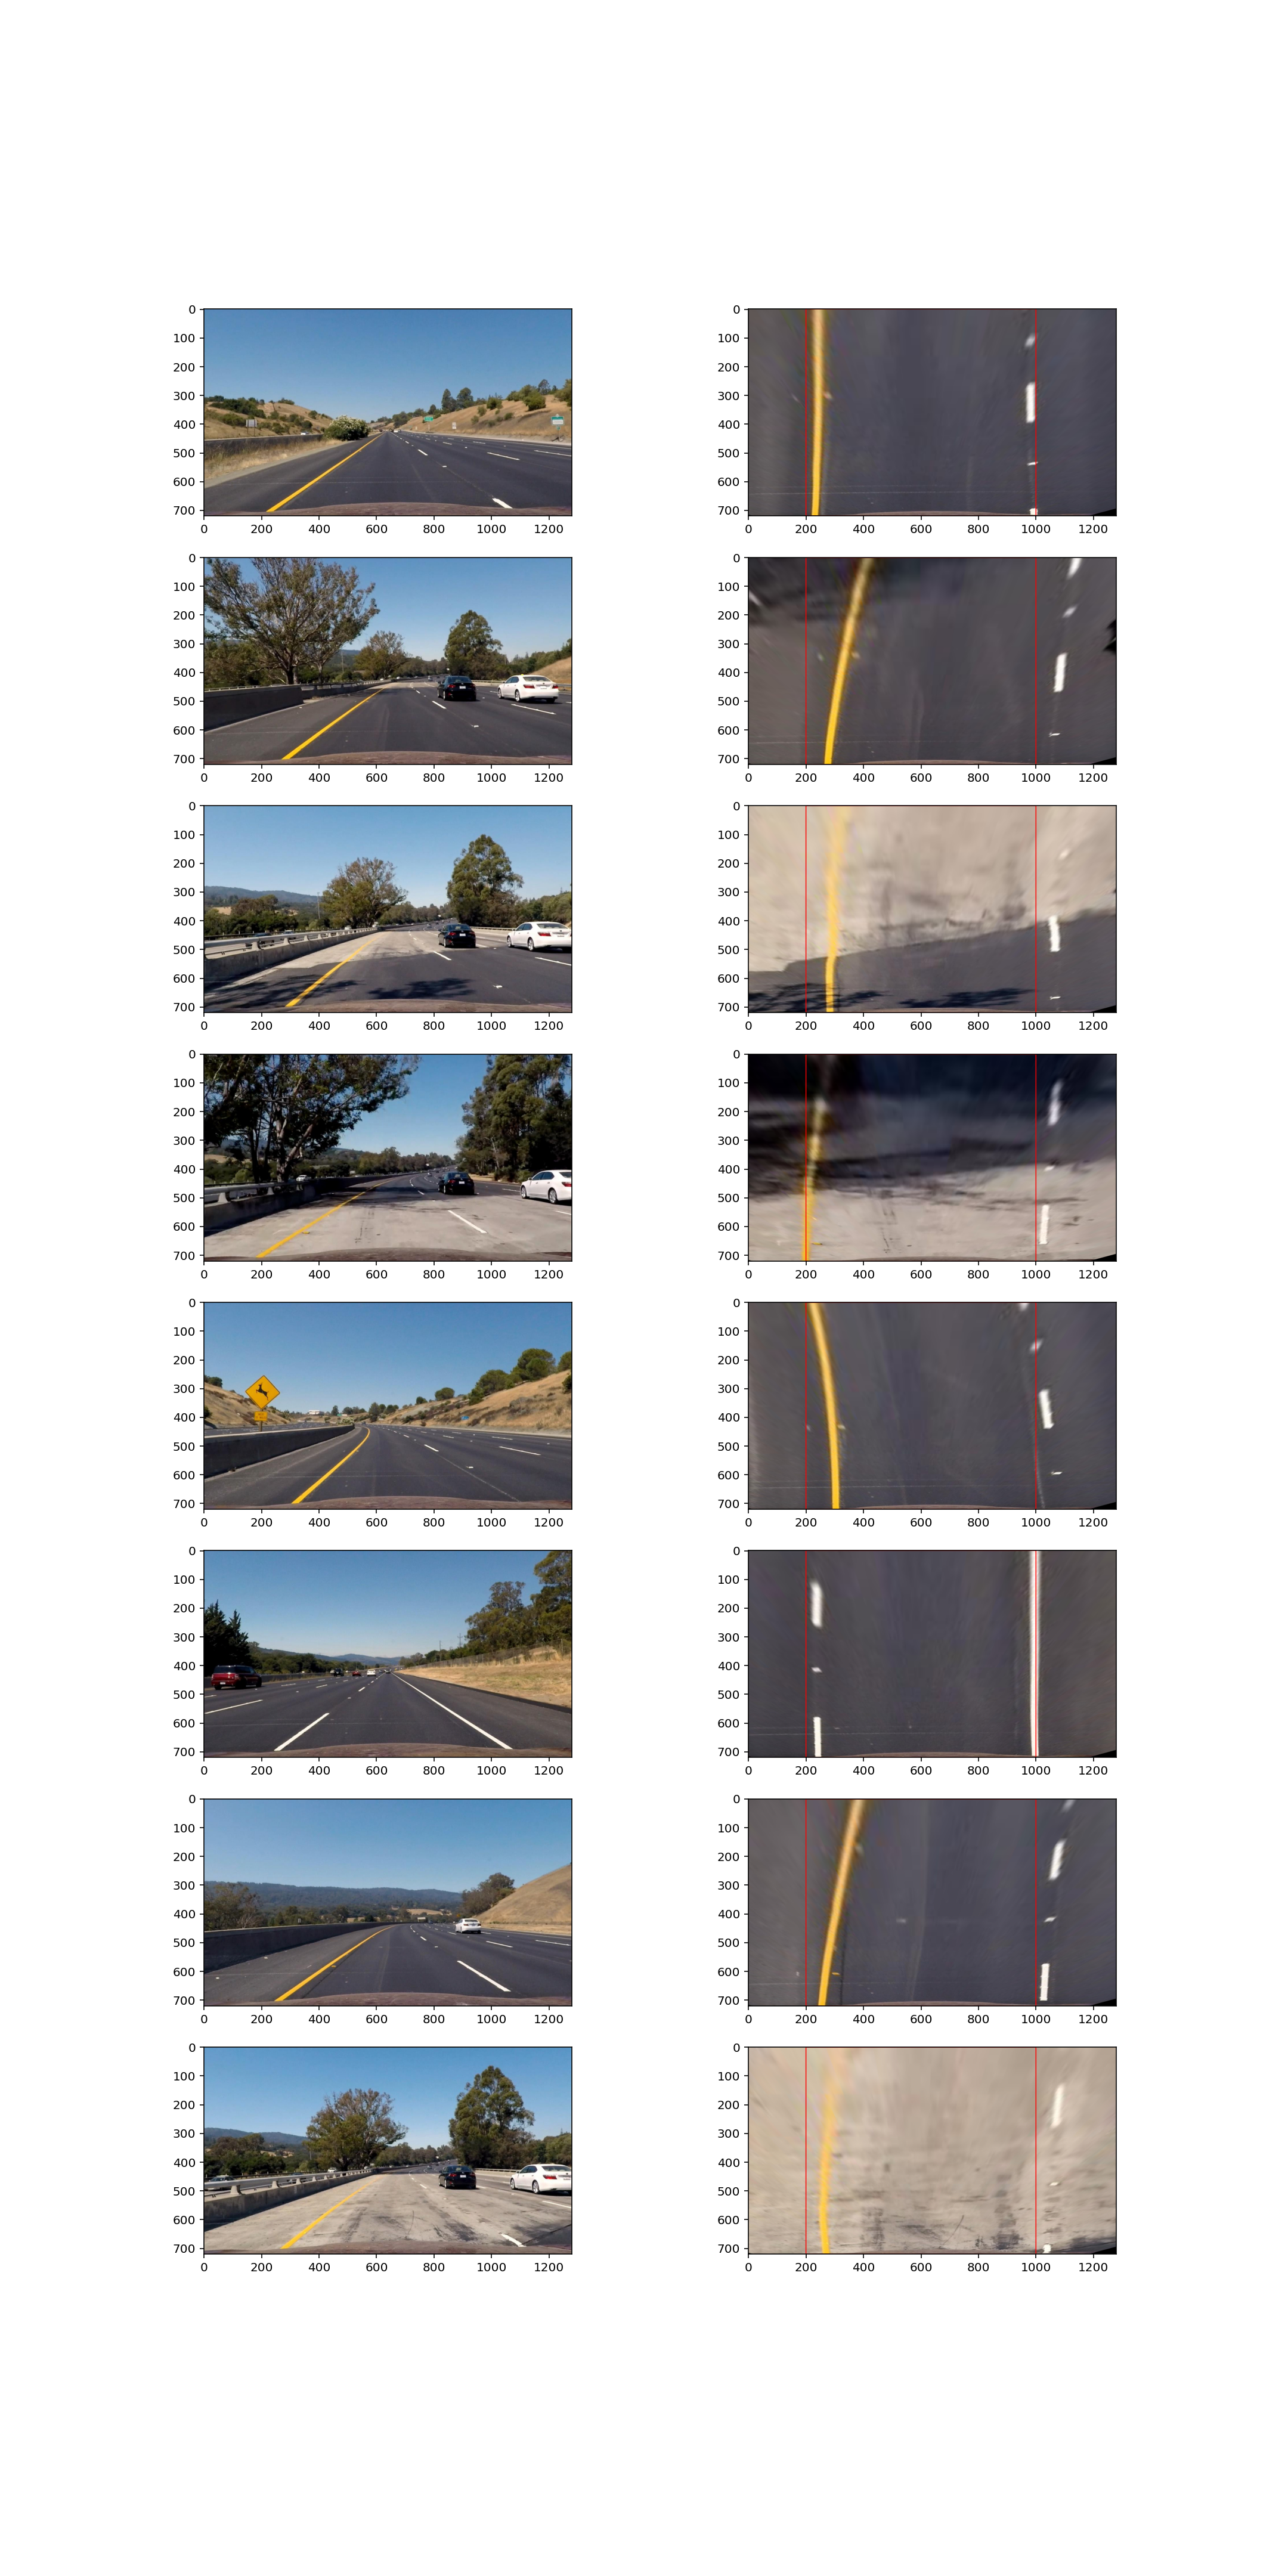

In [30]:
def perspective_transform(image):
    bird_view_image = perspective.bird_view(np.copy(image))
    cv2.polylines(bird_view_image, [np.int32(region.rectangle).reshape((-1,1,2))], True, (255,0,0), thickness=2)
    return bird_view_image

show_side_by_side(images_in_directory('output_images/undistorted_test_images'), perspective_transform)


In [3]:
image = mpimg.imread('test_images/straight_lines1.jpg')
original_image = np.copy(image)
bottom_y = 0.910*height
horizon_y = 0.630*height
bottom_left_x = 0.225*width
bottom_right_x = 0.797*width
horizon_left_x = 0.461*width
horizon_right_x = 0.540*width

source = np.float32([ [bottom_left_x, bottom_y], [horizon_left_x, horizon_y], [horizon_right_x, horizon_y], [bottom_right_x, bottom_y]])
cv2.polylines(image, [np.int32(source).reshape((-1,1,2))], True, (255,0,0), thickness=1)
plt.imshow(image)


NameError: name 'height' is not defined

In [ ]:

(width,height) = (1280,720)

source = np.float32([ [bottom_left_x, bottom_y], [horizon_left_x, horizon_y], [horizon_right_x, horizon_y], [bottom_right_x, bottom_y]])
target = np.float32([[bottom_left_x, height], [bottom_left_x,   0.], [bottom_right_x,  0.], [bottom_right_x, height]])
M = cv2.getPerspectiveTransform(source, target)
Minv = cv2.getPerspectiveTransform(target, source)

warped = cv2.warpPerspective(original_image, M, (width, height))

cv2.polylines(warped, [np.int32(target).reshape((-1,1,2))], True, (255,0,0), thickness=5)

plt.imshow(warped)


In [ ]:

blab = np.copy(warped)
plt.imshow(cv2.warpPerspective(blab, Minv, (width, height)))
